# 1. 필요 라이브러리 가져오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# 2. 데이터 로드하기

In [3]:
df_lol = pd.read_csv('/content/drive/MyDrive/data/lol/high_diamond_ranked_10min.csv')

In [ ]:
df_lol.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


* lol은 두 팀(파랑과 빨강)이 대결하는 MOBA(Multiplayer Online Battle Arena)입니다. 탑,정글,미드,AD,서폿 5개의 역할이 있습니다.
* 위 데이터는 다이아1 ~ 마스터까지의 높은 수준의 게임 유저들의 플레이 결과 데이터이고 게임 시작 후 10분까지의 결과를 나타낸 데이터입니다.

In [ ]:
df_lol.shape

(9879, 40)

* 총 9879개의 데이터와 40개의 변수가 존재하는 데이터이다.

In [ ]:
df_lol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

* 위 데이터에 결측치는 없다.

# 3. 변수 별 시각화하기

## 3.1 BlueWins(target)

In [ ]:
df_lol['blueWins'].value_counts()

0    4949
1    4930
Name: blueWins, dtype: int64

* 블루팀이 이겼으면 1, 레드팀이 이겼으면 0입니다.
* 데이터 중 레드팀이 이긴 게임은 4949개 블루팀이 이긴 게임은 4930개 입니다.

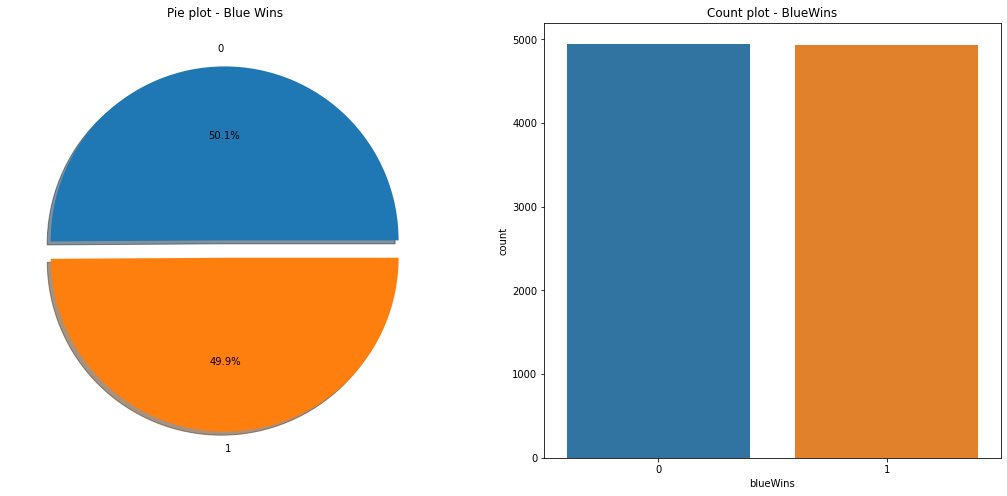

In [6]:
f, ax = plt.subplots(1, 2, figsize = (18,8))


df_lol['blueWins'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Blue Wins')
ax[0].set_ylabel('')
sns.countplot('blueWins', data=df_lol, ax=ax[1])
ax[1].set_title('Count plot - BlueWins')

plt.show()

## 3.2 Wards 관련 변수들

* 와드(wards) : 아군에게 주변 지역을 밝혀주는 아이템

* BlueWardsPlaced : 블루 팀이 10분동안 설치한 와드 수
* BlueWardsDestroyed : 블루 팀이 10분동안 제거한 레드 팀 와드 수
* RedWardsPlaced : 레드 팀이 10분 동안 설치한 와드 수
* RedWardsDestroyed : 레드 팀이 10분동안 제거한 블루 팀 와드 수

In [57]:
# 와드 관련 변수 + target 변수들로만 데이터 셋 만들기
df_wards = df_lol[['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'redWardsPlaced', 'redWardsDestroyed']]
df_wards

,blueWins,blueWardsPlaced,blueWardsDestroyed,redWardsPlaced,redWardsDestroyed
0,0,28,2,15,6
1,0,12,1,12,1
2,0,15,0,15,3
3,0,43,1,15,2
4,0,75,4,17,2
...,...,...,...,...,...
9874,1,17,2,46,3
9875,1,54,0,12,21
9876,0,23,1,14,0
9877,0,14,4,66,4


In [58]:
df_wards.describe()

,blueWins,blueWardsPlaced,blueWardsDestroyed,redWardsPlaced,redWardsDestroyed
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,0.499038,22.288288,2.824881,22.367952,2.723150
std,0.500024,18.019177,2.174998,18.457427,2.138356
min,0.000000,5.000000,0.000000,6.000000,0.000000
25%,0.000000,14.000000,1.000000,14.000000,1.000000
50%,0.000000,16.000000,3.000000,16.000000,2.000000
75%,1.000000,20.000000,4.000000,20.000000,4.000000
max,1.000000,250.000000,27.000000,276.000000,24.000000


* 블루팀 레드팀 모두 평균 22개의 와드를 설치하고 3개 정도의 와드를 제거하는 것으로 보인다.
* 특이한 점은 설치한 와드 수의 최대값이다. 10분동안 200개 이상의 와드를 설치하는 것은 불가능할 것 같다.

In [59]:
df_wards[df_wards['blueWardsPlaced'] == 250]

,blueWins,blueWardsPlaced,blueWardsDestroyed,redWardsPlaced,redWardsDestroyed
8206,1,250,4,16,1


In [60]:
df_wards[df_wards['redWardsPlaced'] == 276]

,blueWins,blueWardsPlaced,blueWardsDestroyed,redWardsPlaced,redWardsDestroyed
2713,0,16,3,276,1


In [61]:
df_wards[df_wards['blueWardsDestroyed'] == 27]

,blueWins,blueWardsPlaced,blueWardsDestroyed,redWardsPlaced,redWardsDestroyed
5712,0,13,27,45,4


In [62]:
df_wards[df_wards['redWardsDestroyed'] == 24]

,blueWins,blueWardsPlaced,blueWardsDestroyed,redWardsPlaced,redWardsDestroyed
2057,1,41,3,19,24
7806,0,47,1,35,24
9674,0,65,2,17,24


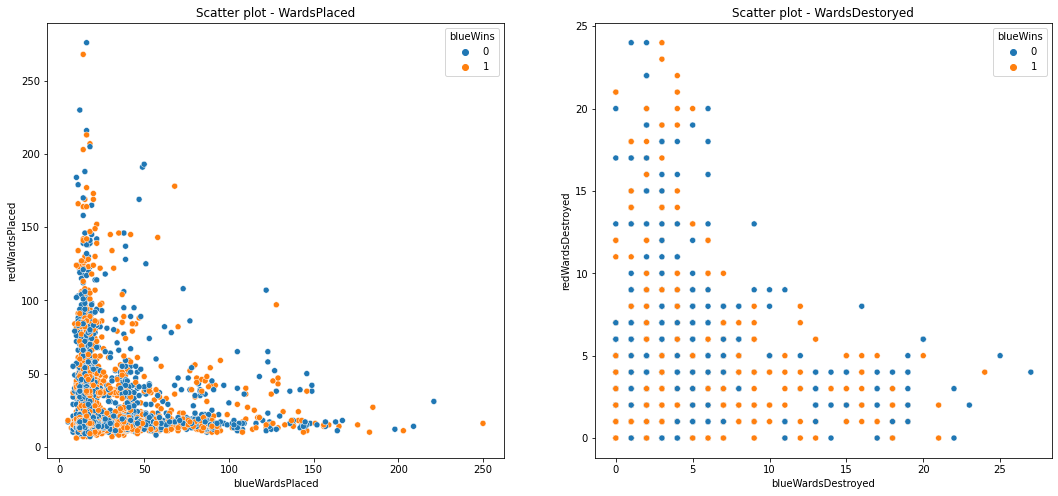

In [63]:
f, ax = plt.subplots(1, 2, figsize = (18,8))


sns.scatterplot(data = df_lol, x = 'blueWardsPlaced', y = 'redWardsPlaced', hue = 'blueWins', ax = ax[0])
ax[0].set_title('Scatter plot - WardsPlaced')
sns.scatterplot(data = df_lol, x = 'blueWardsDestroyed', y = 'redWardsDestroyed', hue = 'blueWins', ax = ax[1])
ax[1].set_title('Scatter plot - WardsDestoryed')

plt.show()

In [64]:
df_lol[(df_lol['blueWardsDestroyed'] == 0) & (df_lol['redWardsDestroyed'] == 0)]

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
56,4514402510,0,17,0,1,5,7,7,1,1,...,0,17259,7.4,19444,218,76,1672,2698,21.8,1725.9
356,4494288234,1,38,0,1,8,2,8,0,0,...,0,14471,6.4,15790,201,51,-3803,-2825,20.1,1447.1
577,4447747806,1,15,0,1,9,5,8,0,0,...,0,14674,6.4,15691,188,32,-3518,-2843,18.8,1467.4
774,4520625705,0,12,0,0,6,9,4,1,0,...,0,17318,6.8,17790,216,47,489,-188,21.6,1731.8
913,4519790060,1,25,0,0,11,10,7,1,1,...,0,17699,6.8,17501,191,46,-1362,-1592,19.1,1769.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9551,4509560405,1,15,0,0,19,4,22,1,1,...,0,15019,6.0,14376,189,38,-7154,-6032,18.9,1501.9
9563,4511994182,1,15,0,0,11,5,9,1,1,...,0,14984,6.4,16234,181,37,-4648,-2498,18.1,1498.4
9606,4520806066,1,13,0,1,8,8,7,1,1,...,0,16640,6.6,16365,208,51,412,-22,20.8,1664.0
9766,4516912566,1,21,0,1,7,0,9,2,1,...,0,11357,5.6,11999,137,45,-7791,-6458,13.7,1135.7


* 와드 파괴 관련 그래프에서 겹치는 값들이 많은 경우 가장 마지막 데이터 값이 적용되는 것 같다.
* ex) 블루 0 레드 0 -> 마지막 데이터 값 블루 승리

In [73]:
# 
df_wards[(df_wards['blueWardsPlaced'] >= 100) | (df_wards['redWardsPlaced'] >= 100)]

,blueWins,blueWardsPlaced,blueWardsDestroyed,redWardsPlaced,redWardsDestroyed
14,1,15,3,102,1
28,0,105,5,65,3
63,1,122,3,14,3
117,1,14,1,102,1
217,0,124,3,17,4
...,...,...,...,...,...
9506,1,10,9,124,0
9531,1,14,2,141,1
9559,1,108,2,10,3
9647,0,103,6,15,6


## 3.2 BlueWardsPlaced

In [ ]:
df_lol['blueWardsPlaced'].value_counts()

16     1255
15     1217
17      988
14      974
18      831
       ... 
165       1
120       1
148       1
111       1
137       1
Name: blueWardsPlaced, Length: 147, dtype: int64

* 블루팀이 게임 내 설치한 와드의 개수이다.
* 10분 내에 100개 이상 설치가 가능한가???...

In [ ]:
df_lol['blueWardsPlaced'].describe()

count    9879.000000
mean       22.288288
std        18.019177
min         5.000000
25%        14.000000
50%        16.000000
75%        20.000000
max       250.000000
Name: blueWardsPlaced, dtype: float64

* 평균 22개 정도의 와드를 게임 시작 10분 후에 설치된다.
* 최소 5개 최대 250개의 와드가 설치된다.
* 100개 이상 설치된 게임은 어떤 게임인가...? 유의미한 데이터인지 알아봐야 할 것 같다.

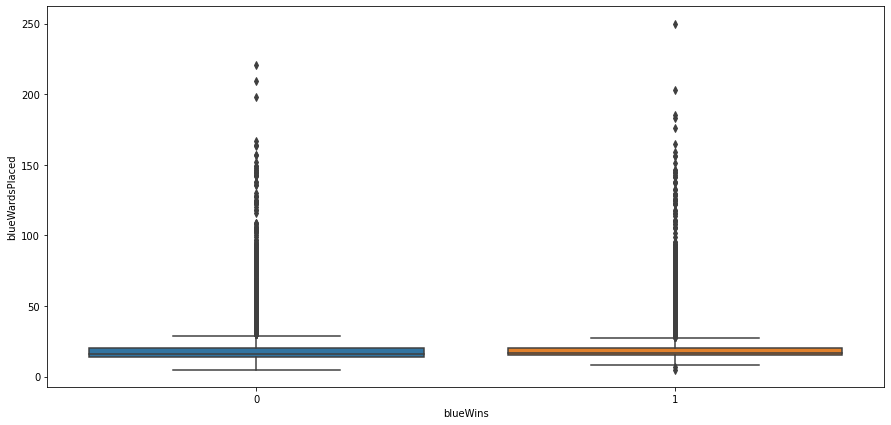

In [ ]:
plt.figure(figsize = (15, 7))
# plt.title('블루팀 승패 별 블루팀 와드 설치 수')
sns.boxplot(data = df_lol, x ='blueWins', y = 'blueWardsPlaced')

* 블루 레드 이긴 팀 상관없이 대부분의 게임에서 50개 미만의 와드가 10분 내에 설치되고 그 이상은 이상치 값으로 나타난다.

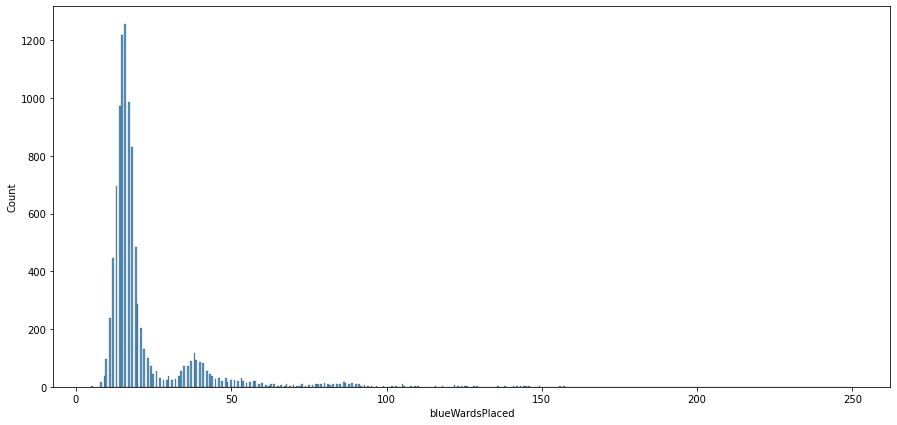

In [ ]:
plt.figure(figsize = (15,7))
sns.histplot(data = df_lol, x = 'blueWardsPlaced')

### 3.2.1 와드가 50개 이상 설치된 게임의 수는 몇 개일까?

In [ ]:
df_lol_wards_50 = df_lol[df_lol['blueWardsPlaced'] >= 50]
df_lol_wards_50

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
23,4520898233,0,78,4,0,4,3,4,2,1,...,0,15500,7.0,17936,220,64,-406,-1283,22.0,1550.0
28,4519148589,0,105,5,1,8,6,13,1,1,...,0,16154,6.8,17849,223,40,-1320,413,22.3,1615.4
63,4516919746,1,122,3,1,9,1,10,2,1,...,0,14336,6.4,16737,233,40,-3933,-2922,23.3,1433.6
65,4514234813,0,52,2,0,6,12,7,0,0,...,1,20376,7.4,19560,240,62,4920,3280,24.0,2037.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9849,4525312579,0,80,5,0,6,7,3,0,0,...,0,16913,7.2,19372,229,44,1019,1564,22.9,1691.3
9858,4527782537,0,51,3,1,3,6,7,1,1,...,0,15816,6.8,17758,195,58,959,1248,19.5,1581.6
9860,4527990640,1,85,3,0,8,7,11,1,0,...,0,17789,7.2,19039,218,58,347,-966,21.8,1778.9
9864,4527898486,1,57,3,1,5,4,5,1,1,...,0,15240,6.8,16761,202,40,-725,-1773,20.2,1524.0


* 총 9879게임 중에서 579개의 게임이 50개 이상의 와드(이상치 값)를 설치했다. -> 제거할까??

## 3.3 BlueWardsDestroyed

In [ ]:
df_lol['blueWardsDestroyed'].value_counts()

2     2357
3     2116
1     1790
4     1413
5      746
0      745
6      345
7      163
8       68
9       22
13      14
15      12
10      12
11      12
18      11
17      10
19       9
12       8
16       8
14       7
20       3
21       2
22       2
23       1
24       1
25       1
27       1
Name: blueWardsDestroyed, dtype: int64

* 블루팀이 파괴한 레드팀 와드 개수이다.
* 대부분의 게임에서 블루팀은 1~4개 정도 상대 와드를 지웠다.


In [ ]:
df_lol['blueWardsDestroyed'].describe()

count    9879.000000
mean        2.824881
std         2.174998
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        27.000000
Name: blueWardsDestroyed, dtype: float64

* 평균 3개 정도의 와드를 게임 시작 10분 후에 제거한다.
* 최소 0개 최대 27개의 와드가 제거된다.

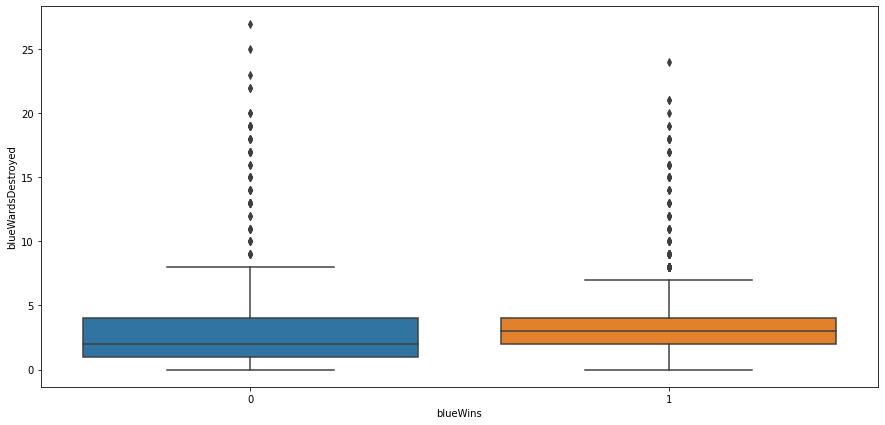

In [ ]:
plt.figure(figsize = (15, 7))
# plt.title('블루 팀 승패 별 블루팀 와드 제거 수')
sns.boxplot(data = df_lol, x ='blueWins', y = 'blueWardsDestroyed')

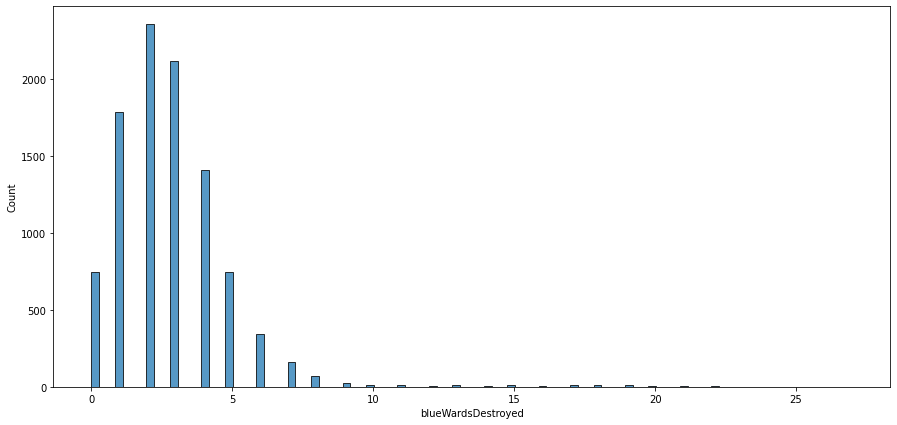

In [ ]:
plt.figure(figsize = (15,7))
sns.histplot(data = df_lol, x = 'blueWardsDestroyed')

### 3.3.1 와드가 10개 이상 제거된 게임의 수는 몇 개일까?

In [ ]:
df_lol_wards_10 = df_lol[df_lol['blueWardsDestroyed'] >= 10]
df_lol_wards_10

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
90,4515706467,0,83,13,1,7,11,3,0,0,...,0,19344,7.2,20509,216,59,3689,4682,21.6,1934.4
121,4522505411,0,14,16,0,3,9,2,0,0,...,0,18439,7.6,20356,255,51,3900,3550,25.5,1843.9
160,4523723534,1,18,11,1,7,6,8,0,0,...,0,14589,6.4,15747,178,22,-3464,-994,17.8,1458.9
223,4500668824,0,50,12,1,6,3,9,1,1,...,0,15892,6.8,18139,254,60,-66,446,25.4,1589.2
294,4475861894,0,18,10,1,2,5,3,1,1,...,0,15785,6.8,17204,243,24,627,-183,24.3,1578.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9553,4506730764,1,78,18,0,6,3,4,2,1,...,0,14787,7.0,18600,216,60,-3917,-2196,21.6,1478.7
9669,4514791683,0,14,14,0,3,7,4,1,0,...,0,17031,7.0,18263,222,55,1234,-26,22.2,1703.1
9695,4526133153,0,13,14,0,6,9,4,1,0,...,0,17866,7.2,19858,244,45,1938,1993,24.4,1786.6
9740,4507071282,0,14,19,0,2,11,2,0,0,...,0,19422,7.6,21120,259,48,5751,4242,25.9,1942.2


* 총 9879게임 중에서 114개의 게임이 10개 이상의 와드(이상치 값)를 제거했다.

### 3.3.2 블루팀이 와드를 10개 이상 제거한 게임에서 50개 이상 와드를 설치한 게임 수는 몇 개일까?

In [ ]:
df_lol_wards_10_50 = df_lol_wards_10[df_lol_wards_10['blueWardsPlaced'] >= 50]
df_lol_wards_10_50

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
90,4515706467,0,83,13,1,7,11,3,0,0,...,0,19344,7.2,20509,216,59,3689,4682,21.6,1934.4
223,4500668824,0,50,12,1,6,3,9,1,1,...,0,15892,6.8,18139,254,60,-66,446,25.4,1589.2
476,4518173580,1,51,11,1,9,1,9,0,0,...,0,14252,6.8,17396,221,64,-4388,-3527,22.1,1425.2
1611,4472428830,0,52,19,0,3,8,4,0,0,...,0,18165,7.4,19097,249,60,4529,4665,24.9,1816.5
1894,4519559671,0,53,15,1,3,9,2,1,0,...,1,19570,6.8,18675,204,51,5694,3457,20.4,1957.0
1947,4457376464,1,95,10,0,6,4,9,0,0,...,0,15195,7.0,17918,218,59,-1446,-446,21.8,1519.5
2935,4522539833,0,70,11,0,6,5,5,1,0,...,0,16004,6.8,16967,222,40,-496,-1530,22.2,1600.4
5339,4464555183,1,80,15,1,10,6,12,0,0,...,0,16055,6.8,16562,196,40,-2896,-1330,19.6,1605.5
6938,4510817893,0,51,10,1,7,5,8,0,0,...,0,15602,6.8,17364,210,58,-1547,-611,21.0,1560.2
7370,4491563778,1,68,19,1,9,3,9,1,1,...,0,15728,6.6,17683,231,48,-2185,-1440,23.1,1572.8


* 12게임이 와드 설치 수도 이상치 값이고 와드 제거 수도 이상치 값이었다.

## 3.4 BlueFirstBlood

In [ ]:
df_lol['blueFirstBlood'].value_counts()

1    4987
0    4892
Name: blueFirstBlood, dtype: int64

* 블루팀이 첫 킬을 따냈으면 1, 레드팀이 따냈으면 0입니다.
* 데이터 중 블루팀이 첫 킬을 한 게임은 4987개이고, 레드팀이 첫 킬을 한 게임은 4892개입니다.

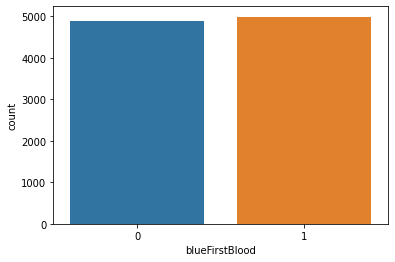

In [ ]:
sns.countplot(x = 'blueFirstBlood', data = df_lol)

### 3.4.1 첫 킬을 딴 팀이 게임을 이겼을까??

In [ ]:
df_lol.groupby(['blueWins','blueFirstBlood'])['blueFirstBlood'].count()

blueWins  blueFirstBlood
0         0                 2949
          1                 2000
1         0                 1943
          1                 2987
Name: blueFirstBlood, dtype: int64

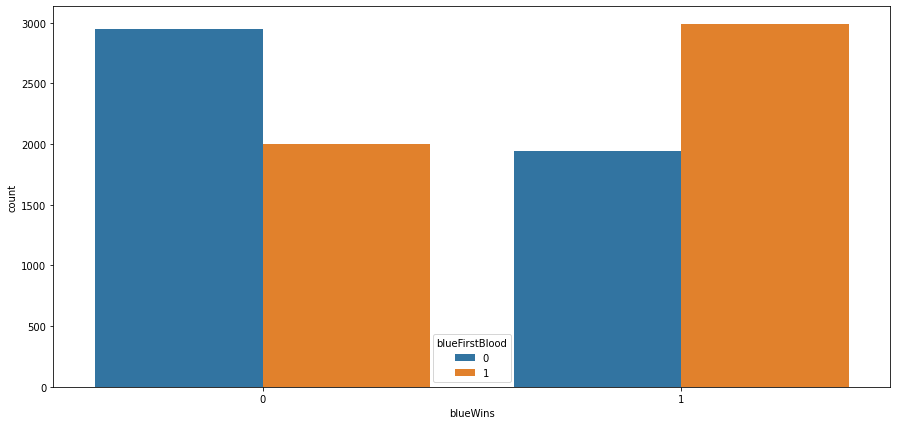

In [ ]:
plt.figure(figsize = (15,7))
sns.countplot(x = 'blueWins', hue = 'blueFirstBlood', data = df_lol)

* 레드팀이 이긴 4949개 게임 중 2949개 게임에서 레드팀이 첫 킬을 했고 블루팀이 이긴 4930게 게임 중 2987개 게임에서 블루팀이 첫 킬을 했다. 

In [ ]:
print('레드팀이 첫 킬을 하고 이긴 확률')
print((2949 / 4949) * 100)
print('블루팀이 첫 킬을 하고 이긴 확률')
print((2987 / 4930) * 100)

레드팀이 첫 킬을 하고 이긴 확률
59.5877955142453
블루팀이 첫 킬을 하고 이긴 확률
60.588235294117645


* 양 팀 모두 첫 킬을 하고 게임을 이길 확률이 60% 정도 된다.
* 첫킬을 하면 이길 확률이 올라가는 것 같다.

## 3.5 BlueKills

In [ ]:
df_lol['blueKills'].value_counts()

6     1322
5     1302
4     1186
7     1138
8      942
3      917
9      717
2      609
10     527
11     340
1      313
12     204
13     147
14      64
0       63
15      38
16      30
17      13
18       4
19       2
22       1
Name: blueKills, dtype: int64

* 블루팀이 킬 한 레드팀 수 이다.
* 대부분의 게임에서 블루팀은 10분 내에 3~ 8킬 정도를 했다.


In [ ]:
df_lol['blueKills'].describe()

count    9879.000000
mean        6.183925
std         3.011028
min         0.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        22.000000
Name: blueKills, dtype: float64

* 블루팀은 평균 6킬 정도를 게임 시작 10분 후에 한다.
* 최소 0킬 최대 22킬를 했다.
* 10분까지 0킬을 했다면 게임을 이기지 못하지 않았을까?
* 반대로 10분까지 킬을 20킬 정도 했으면 게임을 이기지 않았을까?

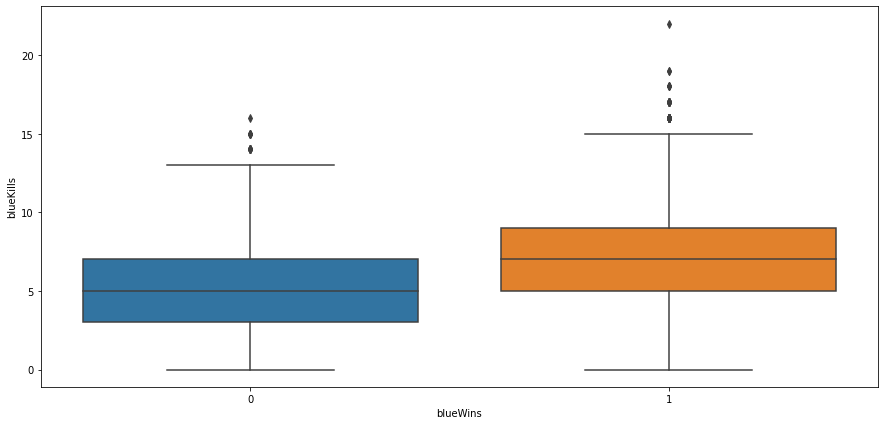

In [ ]:
plt.figure(figsize = (15, 7))
# plt.title('블루팀 승패 별 블루팀 와드 설치 수')
sns.boxplot(data = df_lol, x ='blueWins', y = 'blueKills')

* 블루 팀 킬 최대값인 22킬인 경우에 블루팀이 승리한 것을 알 수 있다.

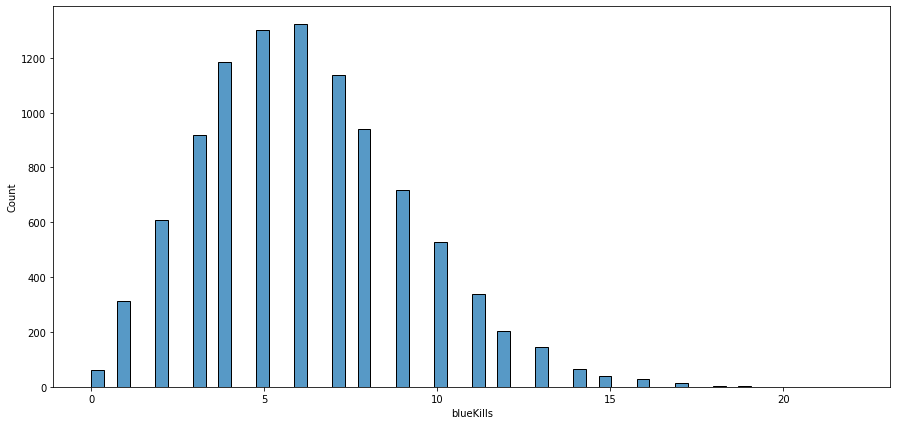

In [ ]:
plt.figure(figsize = (15,7))
sns.histplot(data = df_lol, x = 'blueKills')

### 3.5.1 킬을 많이 하면 게임을 이겼을까?

In [ ]:
df_lol.groupby(['blueWins'])['blueKills'].mean()

blueWins
0    5.170135
1    7.201623
Name: blueKills, dtype: float64

* 블루팀이 졌을 때는 10분 내 평균 5킬, 이겼을 때는 평균 7킬을 했다.

In [ ]:
# 0킬 데이터만 추출
df_kill_0 = df_lol[df_lol['blueKills'] == 0]
df_kill_0

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
193,4523340688,0,15,0,0,0,5,0,0,0,...,0,16307,7.0,18914,229,60,2216,2730,22.9,1630.7
564,4448069997,0,13,1,0,0,6,0,0,0,...,0,16283,7.4,19227,210,54,3205,3400,21.0,1628.3
593,4516376461,0,9,1,0,0,9,0,0,0,...,0,17705,7.4,20260,253,52,4949,4010,25.3,1770.5
652,4449048397,0,37,3,0,0,5,0,0,0,...,0,17405,7.0,19686,272,48,4149,3222,27.2,1740.5
759,4488138739,0,16,4,0,0,5,0,0,0,...,0,16846,7.4,19454,248,60,2320,1718,24.8,1684.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9381,4515259819,1,137,1,0,0,3,0,1,1,...,0,15427,7.0,18448,238,53,1817,1854,23.8,1542.7
9407,4524396486,0,14,2,0,0,5,0,0,0,...,1,17262,7.2,19384,250,55,3051,2114,25.0,1726.2
9460,4506722541,0,11,0,0,0,8,0,0,0,...,0,18393,7.2,19919,239,64,4785,3229,23.9,1839.3
9582,4513383518,0,53,2,0,0,3,0,1,1,...,0,15940,7.2,19192,237,56,2153,1344,23.7,1594.0


In [ ]:
df_kill_0['blueWins'].value_counts()

0    54
1     9
Name: blueWins, dtype: int64

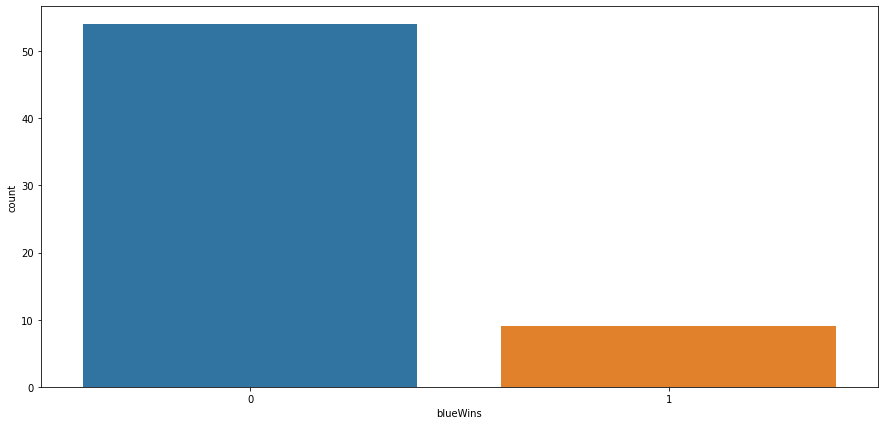

In [ ]:
plt.figure(figsize = (15,7))
sns.countplot(x = 'blueWins', data = df_kill_0)

In [ ]:
print('10분 동안 0킬 했을 때 블루팀이 이길 확률')
print((9 / 63) * 100)

10분 동안 0킬 했을 때 블루팀이 이길 확률
14.285714285714285


* 10분동안 킬을 못하면 이길 확률이 15%도 되지 않는다.